In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [12]:
dfNoObfu = pd.read_csv("../Output/acuNBnoObfu1000exps.csv")
# expDf = pd.read_csv("../Output/exp16.csv") # exp16 is on AROA Paper
expDf = pd.read_csv("../Output/expSpe_29.csv") # expSpe_29 is on AROA Paper
# expDf = pd.read_csv("../Output/expSpe_1000_uti_no5_5.csv")

In [13]:
expDf.head()

,expNum,varBeta,K,nOri,nAtt,feaToCheck,feaToAttack,nTriesFindAttack,nbAcu,nbEr,...,aroaEr,tpAroa,tnAroa,fpAroa,fnAroa,time,FPR_NB,FNR_NB,FPR_AROA,FNR_AROA
0,3,0.25,700,300,20,0,320,5,0.867,0.133,...,0.128,518,520,75,77,00:07:11,0.114286,0.151261,0.126050,0.129412
1,6,0.25,700,300,20,0,320,5,0.862,0.138,...,0.133,507,525,70,88,00:07:12,0.110924,0.164706,0.117647,0.147899
2,10,0.25,700,300,20,0,320,5,0.836,0.164,...,0.155,489,517,78,106,00:07:15,0.122689,0.205042,0.131092,0.178151
3,5,0.25,700,300,20,0,320,5,0.845,0.155,...,0.152,493,516,79,102,00:07:16,0.124370,0.186555,0.132773,0.171429
4,4,0.25,700,300,20,0,320,5,0.856,0.144,...,0.139,508,516,79,87,00:07:17,0.119328,0.168067,0.132773,0.146218


In [14]:
acuNBlist = []
aroaList = []
fprNB = []
fnrNB = []
fprAroa = []
fnrAroa = []
for i in range(10):
    p = i*10
    print("i:",i,"p:",p,"p2:",p+10)
    acuNBlist.append(expDf['nbAcu'][p:p+10].mean())
    aroaList.append(expDf['aroaAcu'][p:p+10].mean())
    fprNB.append(expDf['FPR_NB'][p:p+10].mean())
    fnrNB.append(expDf['FNR_NB'][p:p+10].mean())
    fprAroa.append(expDf['FPR_AROA'][p:p+10].mean())
    fnrAroa.append(expDf['FNR_AROA'][p:p+10].mean())
print("nb: ",acuNBlist)
print("aroa: ",aroaList)
print("fpr_nb: ", fprNB)
print("fnr_nb:", fnrNB)
print("fpr_aroa:", fprAroa)
print("fnr_aroa:", fnrAroa)

i: 0 p: 0 p2: 10
i: 1 p: 10 p2: 20
i: 2 p: 20 p2: 30
i: 3 p: 30 p2: 40
i: 4 p: 40 p2: 50
i: 5 p: 50 p2: 60
i: 6 p: 60 p2: 70
i: 7 p: 70 p2: 80
i: 8 p: 80 p2: 90
i: 9 p: 90 p2: 100
nb:  [0.8555999999999999, 0.8483, 0.8601000000000001, 0.8515, 0.8561, 0.8624, 0.8494999999999999, 0.8533999999999999, 0.8596999999999998, 0.8552]
aroa:  [0.859, 0.8508999999999999, 0.8634999999999999, 0.8560000000000001, 0.8581999999999999, 0.8667, 0.8523999999999999, 0.8577999999999999, 0.8625, 0.859]
fpr_nb:  [0.11663865546218492, 0.1194957983193277, 0.11563025210084028, 0.1193277310924368, 0.1173109243697478, 0.1149579831932774, 0.11798319327731081, 0.1188235294117647, 0.1169747899159664, 0.1186554621848738]
fnr_nb: [0.1722689075630251, 0.18403361344537822, 0.16453781512605042, 0.1774789915966386, 0.17075630252100849, 0.1605042016806722, 0.18302521008403363, 0.1746218487394957, 0.1635294117647059, 0.17109243697478976]
fpr_aroa: [0.12638655462184872, 0.12907563025210061, 0.1253781512605041, 0.12840336134453

In [15]:
# noObfu_ = dfNoObfu['acuNBnoObfu'].values
nb_ = expDf['nbAcu'].values
aroa_ = expDf['aroaAcu'].values
fprNB_ = expDf['FPR_NB'].values
fnrNB_ = expDf['FNR_NB'].values
fprAroa_ = expDf['FPR_AROA'].values
fnrAroa_ = expDf['FNR_AROA'].values

In [16]:
# vecNoObfu = np.round(np.mean(noObfu_.reshape(-1, 100), axis=1),3)
vecNB = np.round(np.mean(nb_.reshape(-1, 100), axis=1),3)
vecAROA = np.round(np.mean(aroa_.reshape(-1, 100), axis=1),3)
vecFprNB = np.round(np.mean(fprNB_.reshape(-1, 100), axis=1),3)
vecFnrNB = np.round(np.mean(fnrNB_.reshape(-1, 100), axis=1),3)
vecFprAroa = np.round(np.mean(fprAroa_.reshape(-1, 100), axis=1),3)
vecFnrAroa = np.round(np.mean(fnrAroa_.reshape(-1, 100), axis=1),3)

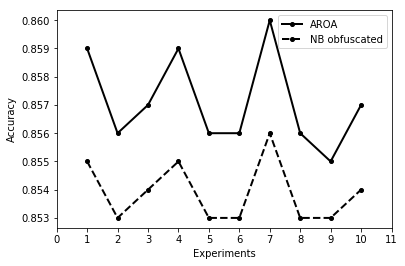

In [18]:
# Plot ACCURACY
plt.plot(np.arange(1, 11, step=1),vecAROA,'o-', color='black', linewidth=2, linestyle='-', markersize=4, label="AROA")
plt.plot(np.arange(1, 11, step=1),vecNB,'o-', color='black', linewidth=2, linestyle='--', markersize=4, label="NB obfuscated")
# plt.plot(vecNoObfu,'o-', color='black', linewidth=2,linestyle=':', markersize=4,label="NB non-obfuscated")
plt.legend(loc=0)
# plt.axis([1, 10, 0.5, 0.99]) # min_x, max_x, min_y, max_y
plt.xticks(np.arange(0, 12, step=1))
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
# plt.title("NB not obfuscated vs obfuscated") # name of the attack
# plt.show()
plt.savefig('../Analysis/Figs/AROAvsNBObfu_uti0_1_no5_v2.png')

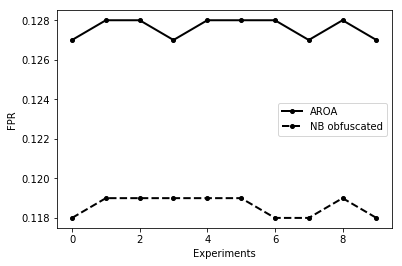

In [17]:
# Plot FPR
plt.plot(vecFprAroa,'o-', color='black', linewidth=2, linestyle='-', markersize=4, label="AROA")
plt.plot(vecFprNB,'o-', color='black', linewidth=2, linestyle='--', markersize=4, label="NB obfuscated")
# plt.plot(vecNoObfu,'o-', color='black', linewidth=2,linestyle=':', markersize=4,label="NB non-obfuscated")
plt.legend(loc=5)
# plt.axis([1, 10, 0.5, 0.99]) # min_x, max_x, min_y, max_y
plt.xlabel("Experiments")
plt.ylabel("FPR")
# plt.title("NB not obfuscated vs obfuscated") # name of the attack
# plt.show()
plt.savefig('../Analysis/Figs/AROAvsNBObfu_uti0_no5_FPR.png')

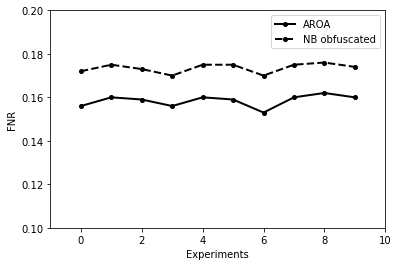

In [23]:
# Plot FNR
plt.plot(vecFnrAroa,'o-', color='black', linewidth=2, linestyle='-', markersize=4, label="AROA")
plt.plot(vecFnrNB,'o-', color='black', linewidth=2, linestyle='--', markersize=4, label="NB obfuscated")
# plt.plot(vecNoObfu,'o-', color='black', linewidth=2,linestyle=':', markersize=4,label="NB non-obfuscated")
plt.legend(loc=0)
plt.axis([-1, 10, 0.1, 0.2]) # min_x, max_x, min_y, max_y
plt.xlabel("Experiments")
plt.ylabel("FNR")
# plt.title("NB not obfuscated vs obfuscated") # name of the attack
# plt.show()
plt.savefig('../Analysis/Figs/AROAvsNBObfu_uti0_no5_FNR.png')

## Expected utility

In [3]:
expDf = pd.read_csv("../Output/expSpe_29.csv") # expSpe_29 is on AROA Paper

In [4]:
expDf.columns

Index(['expNum', 'varBeta', 'K', 'nOri', 'nAtt', 'feaToCheck', 'feaToAttack',
       'nTriesFindAttack', 'nbAcu', 'nbEr', 'tpNB', 'tnNB', 'fpNB', 'fnNB',
       'aroaAcu', 'aroaEr', 'tpAroa', 'tnAroa', 'fpAroa', 'fnAroa', 'time',
       'FPR_NB', 'FNR_NB', 'FPR_AROA', 'FNR_AROA'],
      dtype='object')

In [5]:
uTP=1     # utility True Positives 
uFP=0     # utility False Positives
uFN=-5    # utility False Negatives
uTN=1     # utility True Negatives
utMat = np.array([[uTP,uFP],[uFN,uTN]]) # Classifier utility matrix
expUtiNB = []
expUtiAROA = []
for i in range(1000):
    expUtiNB

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

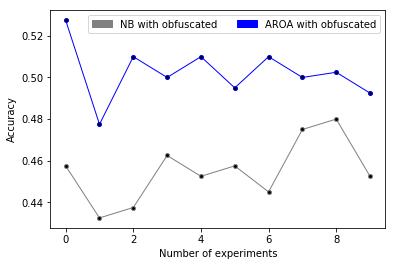

In [27]:
# Plot NB vs Aroa
plt.plot(acuNBlist,'o-', color='grey', linewidth=1, markerfacecolor='k',markersize=4)
plt.plot(aroaList,'o-', color='blue', linewidth=1, markerfacecolor='k',markersize=4)
# plt.plot(dfMeans['expNum'],dfMeans['NBAroa'],'o-', color='brown', linewidth=1, markerfacecolor='k',markersize=4)
blue_line = mpatches.Patch(color='blue', label='AROA with obfuscated')
grey_line = mpatches.Patch(color='grey', label='NB with obfuscated')
# brown_line = mpatches.Patch(color='brown', label='AROA')
plt.legend(handles=[grey_line, blue_line], loc=1, ncol=2)
# plt.axis([0, 45, 0.30, 0.70])
# plt.errorbar(x=dfMeans['expNum'], y=dfMeans['NB'],yerr=dfMeans['NBEr'],fmt='o', ecolor='k', linewidth=1, markerfacecolor='k',markersize=6)
# plt.gca().yaxis.grid(True)
# plt.xlabel("varBeta=0.1,K=2000,nOri=1000,nAtt=100,numData=100")
plt.xlabel("Number of experiments")
plt.ylabel("Accuracy")
# plt.title("Metame attacks simulation") # name of the attack
# plt.show()
plt.savefig('../Analysis/Figs/nbVsAroa_100Bin_1000Fea_exp12.png', dpi=500)

## Plot for var

In [120]:
a1 = np.array(expDf[expDf['var'] == 0.1].mean().values)
a3 = np.array(expDf[expDf['var'] == 0.3].mean().values)
a5 = np.array(expDf[expDf['var'] == 0.5].mean().values)
a7 = np.array(expDf[expDf['var'] == 0.7].mean().values)
a9 = np.array(expDf[expDf['var'] == 0.9].mean().values)
dfMeans = pd.DataFrame([a1,a3,a5,a7,a9],columns=['expNum','var','d','K','AROAAcu','AROAEr','time'])
columnNeeded = ['var','AROAAcu','AROAEr','time']
dfMeans = dfMeans[columnNeeded]
dfMeans

,var,AROAAcu,AROAEr,time
0,0.1,0.556,0.444,0.634
1,0.3,0.546,0.454,0.642
2,0.5,0.548,0.452,0.644
3,0.7,0.556,0.444,0.638
4,0.9,0.540,0.460,0.642


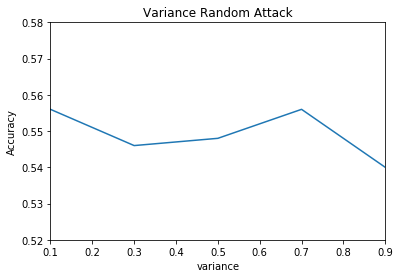

In [124]:
# Plot NBAcu vs var (variance of the beta distribution to get Alan's random attack prob)
plt.plot(dfMeans['var'],dfMeans['AROAAcu'])
plt.axis([0.1, 0.9, 0.52, 0.58])
plt.xlabel("variance")
plt.ylabel("Accuracy")
plt.title("Variance Random Attack") # name of the attack
# plt.show()
# plt.savefig('../Data/ObfusctionPaper/Figs/FakeData/DandVarParameters/acNBvsVarRandomAttack.png', dpi=500)
plt.savefig('../Data/ObfusctionPaper/Figs/RealData/DandVarParameters/varRandomAttack.png', dpi=500)

## Plot for number of experiments (NB vs NBUti vs Aroa)

In [40]:
df = pd.read_csv("../Data/ObfusctionPaper/Exp/FakeData/AcuComp/exp0_100MixtureAttack.csv")

In [41]:
df = df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1)
df.columns

Index(['expNum', 'NB', 'NBEr', 'NBUti', 'NBUtiEr', 'NBAroa', 'NBAroaEr',
       'time'],
      dtype='object')

In [42]:
# dataMeans for 100 experiments
dataMeans = {'expNum':[10,20,30,40,50,60,70,80,90,100],
             'NB':[df['NB'].iloc[0:10:].mean(),
                   df['NB'].iloc[11:21:].mean(),
                   df['NB'].iloc[21:31:].mean(),
                   df['NB'].iloc[31:41:].mean(),
                   df['NB'].iloc[41:51:].mean(),
                   df['NB'].iloc[51:61:].mean(),
                   df['NB'].iloc[61:71:].mean(),
                   df['NB'].iloc[71:81:].mean(),
                   df['NB'].iloc[81:91:].mean(),
                   df['NB'].iloc[91:100:].mean()],
             'NBEr':[df['NBEr'].iloc[0:10:].mean(),
                   df['NBEr'].iloc[11:21:].mean(),
                   df['NBEr'].iloc[21:31:].mean(),
                   df['NBEr'].iloc[31:41:].mean(),
                   df['NBEr'].iloc[41:51:].mean(),
                   df['NBEr'].iloc[51:61:].mean(),
                   df['NBEr'].iloc[61:71:].mean(),
                   df['NBEr'].iloc[71:81:].mean(),
                   df['NBEr'].iloc[81:91:].mean(),
                   df['NBEr'].iloc[91:100:].mean()],
             'NBUti':[df['NBUti'].iloc[0:10:].mean(),
                   df['NBUti'].iloc[11:21:].mean(),
                   df['NBUti'].iloc[21:31:].mean(),
                   df['NBUti'].iloc[31:41:].mean(),
                   df['NBUti'].iloc[41:51:].mean(),
                   df['NBUti'].iloc[51:61:].mean(),
                   df['NBUti'].iloc[61:71:].mean(),
                   df['NBUti'].iloc[71:81:].mean(),
                   df['NBUti'].iloc[81:91:].mean(),
                   df['NBUti'].iloc[91:100:].mean()],
             'NBUtiEr':[df['NBUtiEr'].iloc[0:10:].mean(),
                   df['NBUtiEr'].iloc[11:21:].mean(),
                   df['NBUtiEr'].iloc[21:31:].mean(),
                   df['NBUtiEr'].iloc[31:41:].mean(),
                   df['NBUtiEr'].iloc[41:51:].mean(),
                   df['NBUtiEr'].iloc[51:61:].mean(),
                   df['NBUtiEr'].iloc[61:71:].mean(),
                   df['NBUtiEr'].iloc[71:81:].mean(),
                   df['NBUtiEr'].iloc[81:91:].mean(),
                   df['NBUtiEr'].iloc[91:100:].mean()],
             'NBAroa':[df['NBAroa'].iloc[0:10:].mean(),
                   df['NBAroa'].iloc[11:21:].mean(),
                   df['NBAroa'].iloc[21:31:].mean(),
                   df['NBAroa'].iloc[31:41:].mean(),
                   df['NBAroa'].iloc[41:51:].mean(),
                   df['NBAroa'].iloc[51:61:].mean(),
                   df['NBAroa'].iloc[61:71:].mean(),
                   df['NBAroa'].iloc[71:81:].mean(),
                   df['NBAroa'].iloc[81:91:].mean(),
                   df['NBAroa'].iloc[91:100:].mean()],
             'NBAroaEr':[df['NBAroaEr'].iloc[0:10:].mean(),
                   df['NBAroaEr'].iloc[11:21:].mean(),
                   df['NBAroaEr'].iloc[21:31:].mean(),
                   df['NBAroaEr'].iloc[31:41:].mean(),
                   df['NBAroaEr'].iloc[41:51:].mean(),
                   df['NBAroaEr'].iloc[51:61:].mean(),
                   df['NBAroaEr'].iloc[61:71:].mean(),
                   df['NBAroaEr'].iloc[71:81:].mean(),
                   df['NBAroaEr'].iloc[81:91:].mean(),
                   df['NBAroaEr'].iloc[91:100:].mean()],
            'time':[df['time'].iloc[0:10:].mean(),
                   df['time'].iloc[11:21:].mean(),
                   df['time'].iloc[21:31:].mean(),
                   df['time'].iloc[31:41:].mean(),
                   df['time'].iloc[41:51:].mean(),
                   df['time'].iloc[51:61:].mean(),
                   df['time'].iloc[61:71:].mean(),
                   df['time'].iloc[71:81:].mean(),
                   df['time'].iloc[81:91:].mean(),
                   df['time'].iloc[91:100:].mean()],
            }
dfMeans = pd.DataFrame(dataMeans, columns = ['expNum','NB','NBEr','NBUti','NBUtiEr','NBAroa','NBAroaEr','time'])
dfMeans

,expNum,NB,NBEr,NBUti,NBUtiEr,NBAroa,NBAroaEr,time
0,10,0.475000,0.211000,0.559000,0.440000,0.789000,0.211000,0.137000
1,20,0.505000,0.235000,0.513000,0.487000,0.765000,0.235000,0.138000
2,30,0.461000,0.199000,0.533000,0.466000,0.801000,0.199000,0.136000
3,40,0.464000,0.214000,0.551000,0.449000,0.786000,0.214000,0.140000
4,50,0.511000,0.256000,0.534000,0.464000,0.744000,0.256000,0.137000
5,60,0.511000,0.238000,0.509000,0.489000,0.762000,0.238000,0.138000
6,70,0.491000,0.208000,0.540000,0.459000,0.792000,0.208000,0.139000
7,80,0.502000,0.225000,0.589000,0.411000,0.775000,0.225000,0.134000
8,90,0.504000,0.222000,0.528000,0.472000,0.778000,0.222000,0.138000
9,100,0.504444,0.198889,0.576667,0.423333,0.801111,0.198889,0.135556


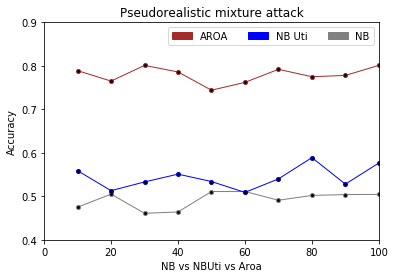

In [44]:
# Plot NB vs NBUti vs Aroa
plt.plot(dfMeans['expNum'],dfMeans['NB'],'o-', color='grey', linewidth=1, markerfacecolor='k',markersize=4)
plt.plot(dfMeans['expNum'],dfMeans['NBUti'],'o-', color='blue', linewidth=1, markerfacecolor='k',markersize=4)
plt.plot(dfMeans['expNum'],dfMeans['NBAroa'],'o-', color='brown', linewidth=1, markerfacecolor='k',markersize=4)
grey_line = mpatches.Patch(color='grey', label='NB')
blue_line = mpatches.Patch(color='blue', label='NB Uti')
brown_line = mpatches.Patch(color='brown', label='AROA')
plt.legend(handles=[brown_line, blue_line, grey_line], loc=1, ncol=3)
plt.axis([0, 100, 0.40, 0.90])
# plt.errorbar(x=dfMeans['expNum'], y=dfMeans['NB'],yerr=dfMeans['NBEr'],fmt='o', ecolor='k', linewidth=1, markerfacecolor='k',markersize=6)
# plt.gca().yaxis.grid(True)
plt.xlabel("NB vs NBUti vs Aroa")
plt.ylabel("Accuracy")
plt.title("Pseudorealistic mixture attack") # name of the attack
# plt.show()
plt.savefig('../Data/ObfusctionPaper/Figs/FakeData/exp0_100PseduorealisticMixtureAttack.png', dpi=500)

## Plot for maxValueRange

In [19]:
expDf = pd.read_csv("../Data/ObfusctionPaper/Exp/FakeData/exp0_300maxValueRandomAttack.csv")

In [20]:
expDf = expDf.drop(expDf.columns[expDf.columns.str.contains('Unnamed',case = False)],axis = 1)
expDf.columns

Index(['expNum', 'maxRangeValue', 'NB', 'NBEr', 'NBUti', 'NBUtiEr', 'NBAroa',
       'NBAroaEr', 'time'],
      dtype='object')

In [21]:
a1 = np.array(expDf[expDf['maxRangeValue'] == 0].mean().values)
a2 = np.array(expDf[expDf['maxRangeValue'] == 1].mean().values)
a3 = np.array(expDf[expDf['maxRangeValue'] == 2].mean().values)
a4 = np.array(expDf[expDf['maxRangeValue'] == 3].mean().values)
a5 = np.array(expDf[expDf['maxRangeValue'] == 4].mean().values)
a6 = np.array(expDf[expDf['maxRangeValue'] == 5].mean().values)
a7 = np.array(expDf[expDf['maxRangeValue'] == 6].mean().values)
a8 = np.array(expDf[expDf['maxRangeValue'] == 7].mean().values)
a9 = np.array(expDf[expDf['maxRangeValue'] == 8].mean().values)
a10 = np.array(expDf[expDf['maxRangeValue'] == 9].mean().values)
a11 = np.array(expDf[expDf['maxRangeValue'] == 10].mean().values)
a12 = np.array(expDf[expDf['maxRangeValue'] == 11].mean().values)
a13 = np.array(expDf[expDf['maxRangeValue'] == 12].mean().values)
a14 = np.array(expDf[expDf['maxRangeValue'] == 13].mean().values)
a15 = np.array(expDf[expDf['maxRangeValue'] == 14].mean().values)
a16 = np.array(expDf[expDf['maxRangeValue'] == 15].mean().values)

dfMeans = pd.DataFrame([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16],
                       columns=['expNum', 'maxRangeValue', 'NB', 'NBEr', 'NBUti', 'NBUtiEr', 'NBAroa','NBAroaEr', 'time'])
dfMeans

,expNum,maxRangeValue,NB,NBEr,NBUti,NBUtiEr,NBAroa,NBAroaEr,time
0,9.5,0.0,0.5095,0.2185,0.5430,0.4565,0.7815,0.2185,0.1370
1,9.5,1.0,0.5010,0.2285,0.5200,0.4790,0.7715,0.2285,0.1330
2,9.5,2.0,0.5000,0.2160,0.5250,0.4735,0.7840,0.2160,0.1395
3,9.5,3.0,0.5040,0.2205,0.5405,0.4590,0.7795,0.2205,0.1380
4,9.5,4.0,0.4970,0.2295,0.5380,0.4620,0.7705,0.2295,0.1440
5,9.5,5.0,0.5045,0.2240,0.5430,0.4565,0.7760,0.2240,0.1360
6,9.5,6.0,0.4390,0.1970,0.5665,0.4320,0.8030,0.1970,0.1365
7,9.5,7.0,0.4865,0.2170,0.5595,0.4395,0.7830,0.2170,0.1350
8,9.5,8.0,0.4720,0.2250,0.5405,0.4590,0.7750,0.2250,0.1370
9,9.5,9.0,0.4755,0.2085,0.5595,0.4400,0.7915,0.2085,0.1355


In [22]:
dfMeans.shape

(16, 9)

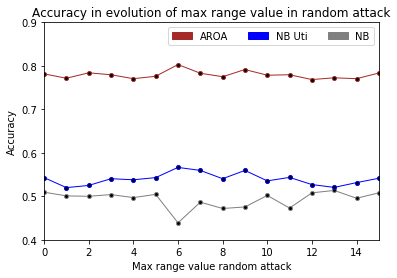

In [39]:
plt.plot(dfMeans['maxRangeValue'],dfMeans['NB'],'o-', color='grey', linewidth=1, markerfacecolor='k',markersize=4)
plt.plot(dfMeans['maxRangeValue'],dfMeans['NBUti'],'o-', color='blue', linewidth=1, markerfacecolor='k',markersize=4)
plt.plot(dfMeans['maxRangeValue'],dfMeans['NBAroa'],'o-', color='brown', linewidth=1, markerfacecolor='k',markersize=4)
grey_line = mpatches.Patch(color='grey', label='NB')
blue_line = mpatches.Patch(color='blue', label='NB Uti')
brown_line = mpatches.Patch(color='brown', label='AROA')
plt.legend(handles=[brown_line, blue_line, grey_line], loc=1, ncol=3)
plt.axis([0, 15, 0.40, 0.90])
# plt.errorbar(x=dfMeans['expNum'], y=dfMeans['NB'],yerr=dfMeans['NBEr'],fmt='o', ecolor='k', linewidth=1, markerfacecolor='k',markersize=6)
# plt.gca().yaxis.grid(True)
plt.xlabel("Max range value random attack")
plt.ylabel("Accuracy")
plt.title("Accuracy in evolution of max range value in random attack") # name of the attack
# plt.show()
plt.savefig('../Data/ObfusctionPaper/Figs/FakeData/exp0_300maxValueRandomAttack.png', dpi=500)